In [1]:
using ITensors
using Plots
using DelimitedFiles
using Statistics

In [2]:
function tfimMPO(sites, h::Float64,t::Float64, V::Float64, U::Float64, Vg::Float64)
  # Input operator terms which define a Hamiltonian
  N = length(sites)
  ampo = OpSum()
  hop = append!(append!([V], fill(-t, (N-3))), [V])
  ampo = OpSum()
  ampo += U, "Nupdn", 1
  ampo += U, "Nupdn", N
  for i in collect(1:N-1)
    ampo += hop[i], "Cdagup", i, "Cup", i+1
    ampo += hop[i], "Cdagup", i+1, "Cup", i
    ampo += hop[i], "Cdagdn", i, "Cdn", i+1
    ampo += hop[i], "Cdagdn", i+1, "Cdn", i
  end
    
  ampo += Vg + h, "Nup", N
  ampo += Vg - h, "Ndn", N
    
  ampo += Vg, "Nup", 1
  ampo += Vg, "Ndn", 1
  # Convert these terms to an MPO tensor network
  return MPO(ampo, sites)
end

tfimMPO (generic function with 1 method)

In [34]:
function Kondo_RKKY(V, h)
    N = 10
    sites = siteinds("Electron", N)
    psi0 = randomMPS(sites; linkdims=10)

    # define parameters for DMRG sweeps
    sweeps = Sweeps(20)
    setmaxdim!(sweeps, 10, 20, 100, 200, 500, 800)
    setnoise!(sweeps, 1E-5,1E-5,1E-6,1E-6,1E-12)
    setcutoff!(sweeps, 1E-15)
    
    Sz_observer = DMRGObserver(["Sz"], sites; energy_tol=1E-15)
    H = tfimMPO(sites, h, 1., V, 1., -0.5)
    energy, psi = dmrg(H, psi0, sweeps; observer=Sz_observer)
    
    print("\n", mean(measurements(Sz_observer)["Sz"][end] - measurements(Sz_observer)["Sz"][end-1])/h, "\n")
            
    return measurements(Sz_observer)["Sz"][end]
   
end

Kondo_RKKY (generic function with 1 method)

In [13]:
chi_  = []
for V in collect(0.1:0.1:2.1)
    push!(chi_, Kondo_RKKY(V, 0.05))
end

After sweep 1 energy=-2.976192207680044  maxlinkdim=10 maxerr=7.80E-03 time=0.004
After sweep 2 energy=-3.0213051727884643  maxlinkdim=20 maxerr=4.54E-09 time=0.004
After sweep 3 energy=-3.0534802068140583  maxlinkdim=24 maxerr=6.91E-17 time=0.005
After sweep 4 energy=-3.0615007264050265  maxlinkdim=24 maxerr=8.74E-17 time=0.004
After sweep 5 energy=-3.0628650344351502  maxlinkdim=17 maxerr=8.34E-16 time=0.015
After sweep 6 energy=-3.063081194185811  maxlinkdim=16 maxerr=3.92E-16 time=0.005
After sweep 7 energy=-3.063115152861301  maxlinkdim=16 maxerr=1.22E-17 time=0.010
After sweep 8 energy=-3.063120543711216  maxlinkdim=16 maxerr=1.30E-16 time=0.007
After sweep 9 energy=-3.063121461704426  maxlinkdim=16 maxerr=9.51E-16 time=0.010
After sweep 10 energy=-3.063121681062707  maxlinkdim=16 maxerr=9.75E-16 time=0.006
After sweep 11 energy=-3.0631217940696605  maxlinkdim=16 maxerr=2.02E-16 time=0.007
After sweep 12 energy=-3.063121892209352  maxlinkdim=16 maxerr=1.87E-16 time=0.005
After sw

After sweep 3 energy=-3.7351516046242352  maxlinkdim=24 maxerr=0.00E+00 time=0.015
After sweep 4 energy=-3.735225943396219  maxlinkdim=24 maxerr=1.85E-16 time=0.014
After sweep 5 energy=-3.735226922001271  maxlinkdim=20 maxerr=3.99E-17 time=0.015
After sweep 6 energy=-3.735226938454921  maxlinkdim=20 maxerr=1.29E-17 time=0.006
After sweep 7 energy=-3.7352269387731414  maxlinkdim=20 maxerr=7.83E-17 time=0.013
After sweep 8 energy=-3.7352269387800856  maxlinkdim=20 maxerr=2.25E-17 time=0.014
After sweep 9 energy=-3.7352269387802486  maxlinkdim=20 maxerr=2.63E-16 time=0.005
After sweep 10 energy=-3.735226938780256  maxlinkdim=20 maxerr=1.97E-16 time=0.013
After sweep 11 energy=-3.735226938780255  maxlinkdim=20 maxerr=0.00E+00 time=0.013
After sweep 12 energy=-3.7352269387802535  maxlinkdim=20 maxerr=0.00E+00 time=0.005
After sweep 13 energy=-3.7352269387802544  maxlinkdim=20 maxerr=2.47E-16 time=0.013
Energy difference less than 1.0e-15, stopping DMRG

8.066811107987348e-11
After sweep 1 

After sweep 2 energy=-7.227167639161905  maxlinkdim=20 maxerr=7.26E-09 time=0.016
After sweep 3 energy=-7.2271768940745975  maxlinkdim=20 maxerr=2.45E-16 time=0.013
After sweep 4 energy=-7.2271768956922955  maxlinkdim=20 maxerr=7.11E-17 time=0.015
After sweep 5 energy=-7.227176895692596  maxlinkdim=20 maxerr=5.80E-17 time=0.015
After sweep 6 energy=-7.22717689569259  maxlinkdim=20 maxerr=1.19E-16 time=0.018
After sweep 7 energy=-7.227176895692591  maxlinkdim=20 maxerr=7.13E-17 time=0.012
Energy difference less than 1.0e-15, stopping DMRG

-1.0863543137978882e-13
After sweep 1 energy=-7.603587663849756  maxlinkdim=10 maxerr=1.06E-03 time=0.014
After sweep 2 energy=-7.608422757374452  maxlinkdim=20 maxerr=2.71E-10 time=0.005
After sweep 3 energy=-7.608423211210399  maxlinkdim=20 maxerr=2.01E-16 time=0.009
After sweep 4 energy=-7.608423211435927  maxlinkdim=20 maxerr=1.72E-16 time=0.005
After sweep 5 energy=-7.608423211436042  maxlinkdim=20 maxerr=0.00E+00 time=0.009
After sweep 6 energy=

In [6]:
chi_

20-element Vector{Any}:
 [0.2569995486221286, -0.0017116141788444852, 0.0010704039457488186, -0.0011180711884122736, 0.0007359186648653432, -0.0009151754297163882, 0.0006080055182762109, -0.0008379584521372302, 0.0005690284998507328, -0.0008310698864868783, 0.0005920707000811302, -0.0008850911994933558, 0.0006813644748717793, -0.0010182119092861735, 0.0008733087250316379, -0.0012954740675234495, 0.0012853038275775716, -0.0019456405684938085, 0.0024439233119974784, -0.4958438422727469]
 [0.3562548379547517, -0.008571223143481653, 0.006141055748281612, -0.005361256642014111, 0.00431172840377337, -0.004226773198010581, 0.003569049268348782, -0.0037452213360696204, 0.003280104852737984, -0.0036125230584671264, 0.0032878321115865383, -0.0037583508479582368, 0.003585492572755864, -0.004236237976437541, 0.004299880356506166, -0.00528477294785311, 0.005867726450961907, -0.007762990823301896, 0.010277102018294217, -0.4814579182787091]
 [0.29617076366908146, -0.016608146449815446, 0.011773248873

In [30]:
# importing DelimitedFiles
using DelimitedFiles
 
 
# writedlm function
writedlm("chi_h05_corr_n10_NEW.xls", chi1, chi2, chi3)

LoadError: MethodError: no method matching writedlm(::String, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  writedlm(::AbstractString, ::Any, ::Any; opts...) at /files/home/part1/ferrari/Xenial/packages/julias/julia-1.7.3/share/julia/stdlib/v1.7/DelimitedFiles/src/DelimitedFiles.jl:788
[0m  writedlm([91m::IO[39m, ::Any, ::Any; opts...) at /files/home/part1/ferrari/Xenial/packages/julias/julia-1.7.3/share/julia/stdlib/v1.7/DelimitedFiles/src/DelimitedFiles.jl:776
[0m  writedlm(::Any, ::Any; opts...) at /files/home/part1/ferrari/Xenial/packages/julias/julia-1.7.3/share/julia/stdlib/v1.7/DelimitedFiles/src/DelimitedFiles.jl:827
[0m  ...

In [37]:
chi1 = Kondo_RKKY(0.35, 0.05)

After sweep 1 energy=-10.586621247349106  maxlinkdim=10 maxerr=3.40E-02 time=0.027
After sweep 2 energy=-10.744999482785898  maxlinkdim=20 maxerr=4.26E-04 time=0.055
After sweep 3 energy=-10.771635449673308  maxlinkdim=100 maxerr=1.13E-06 time=0.352
After sweep 4 energy=-10.779900296007789  maxlinkdim=200 maxerr=1.60E-08 time=1.368
After sweep 5 energy=-10.783751328948123  maxlinkdim=500 maxerr=2.22E-11 time=4.461
After sweep 6 energy=-10.78651792779292  maxlinkdim=800 maxerr=4.12E-13 time=10.727
After sweep 7 energy=-10.788715289083074  maxlinkdim=800 maxerr=1.35E-12 time=11.096
After sweep 8 energy=-10.789696000282609  maxlinkdim=800 maxerr=1.44E-12 time=10.665
After sweep 9 energy=-10.789964848289506  maxlinkdim=800 maxerr=7.37E-13 time=11.048
After sweep 10 energy=-10.790034818648934  maxlinkdim=800 maxerr=3.06E-13 time=10.708
After sweep 11 energy=-10.790058731210038  maxlinkdim=800 maxerr=1.48E-13 time=11.127
After sweep 12 energy=-10.79006894584731  maxlinkdim=800 maxerr=7.41E-1

10-element Vector{Float64}:
  0.3960171007469997
 -0.027567626941972206
  0.024426662947044674
 -0.01935503835736951
  0.020853496556678407
 -0.018460002979856296
  0.022244939119340015
 -0.022667859399327396
  0.03152598682050393
 -0.40701766764334213

In [35]:
chi2 = Kondo_RKKY(0.45, 0.05)

After sweep 1 energy=-10.772838080897527  maxlinkdim=10 maxerr=4.84E-02 time=0.021
After sweep 2 energy=-10.893334598391272  maxlinkdim=20 maxerr=3.61E-04 time=0.048
After sweep 3 energy=-10.919981674954629  maxlinkdim=100 maxerr=5.38E-07 time=0.454
After sweep 4 energy=-10.93682900355461  maxlinkdim=200 maxerr=2.08E-08 time=1.351
After sweep 5 energy=-10.950267878977998  maxlinkdim=500 maxerr=5.53E-11 time=4.649
After sweep 6 energy=-10.958686781054784  maxlinkdim=800 maxerr=1.20E-12 time=11.217
After sweep 7 energy=-10.963196474790632  maxlinkdim=800 maxerr=3.96E-12 time=11.171
After sweep 8 energy=-10.965516157470773  maxlinkdim=800 maxerr=4.47E-12 time=11.133
After sweep 9 energy=-10.96583935198128  maxlinkdim=800 maxerr=1.17E-12 time=11.311
After sweep 10 energy=-10.965864070033811  maxlinkdim=800 maxerr=1.29E-13 time=11.198
After sweep 11 energy=-10.965865531154712  maxlinkdim=800 maxerr=1.47E-14 time=11.235
After sweep 12 energy=-10.965865561176985  maxlinkdim=741 maxerr=1.03E-1

10-element Vector{Float64}:
  0.22588572929950032
 -0.024451014788451825
  0.025141530513283723
 -0.017944158452146506
  0.022649088672519403
 -0.017817989139757812
  0.024630602216567418
 -0.02250253351269052
  0.03433038283997574
 -0.249921637648838

In [36]:
chi3 = Kondo_RKKY(0.55, 0.05)

After sweep 1 energy=-11.029665318115114  maxlinkdim=10 maxerr=3.40E-02 time=0.036
After sweep 2 energy=-11.16002491966999  maxlinkdim=20 maxerr=8.41E-04 time=0.127
After sweep 3 energy=-11.200989719754652  maxlinkdim=100 maxerr=1.56E-06 time=0.379
After sweep 4 energy=-11.203153022087283  maxlinkdim=200 maxerr=8.96E-09 time=1.311
After sweep 5 energy=-11.203355584043722  maxlinkdim=500 maxerr=6.77E-13 time=4.797
After sweep 6 energy=-11.203359716071592  maxlinkdim=800 maxerr=1.32E-15 time=11.533
After sweep 7 energy=-11.20335972207214  maxlinkdim=751 maxerr=9.88E-16 time=10.016
After sweep 8 energy=-11.2033597220835  maxlinkdim=679 maxerr=9.98E-16 time=7.351
After sweep 9 energy=-11.20335972208353  maxlinkdim=647 maxerr=9.96E-16 time=7.828
After sweep 10 energy=-11.203359722083526  maxlinkdim=648 maxerr=9.97E-16 time=7.322
After sweep 11 energy=-11.203359722083524  maxlinkdim=648 maxerr=9.95E-16 time=7.579
After sweep 12 energy=-11.203359722083537  maxlinkdim=650 maxerr=9.96E-16 time=

10-element Vector{Float64}:
  0.09576405053826627
 -0.01313640945381396
  0.017497275986613735
 -0.010044618547950855
  0.01676271155967072
 -0.010786965031614231
  0.018950344622492267
 -0.01498805560114269
  0.027104534660698325
 -0.12712286873321965

In [26]:
print(chi1)

[0.3776893320810479, -0.0256043604816964, 0.022095599884263784, -0.016294403018464878, 0.01680368055235454, -0.012930130916015707, 0.01456627469049705, -0.011444400445280707, 0.01363576644855189, -0.010962160612919906, 0.013552164897270215, -0.01126379623978583, 0.01426663030479591, -0.012455824153310414, 0.016067011032296564, -0.015096606212609432, 0.019983977299694835, -0.021217965789430034, 0.03077320300041595, -0.40473236207593494]

In [38]:
print(chi1)
print(chi2)
print(chi3)

[0.3960171007469997, -0.027567626941972206, 0.024426662947044674, -0.01935503835736951, 0.020853496556678407, -0.018460002979856296, 0.022244939119340015, -0.022667859399327396, 0.03152598682050393, -0.40701766764334213][0.22588572929950032, -0.024451014788451825, 0.025141530513283723, -0.017944158452146506, 0.022649088672519403, -0.017817989139757812, 0.024630602216567418, -0.02250253351269052, 0.03433038283997574, -0.249921637648838][0.09576405053826627, -0.01313640945381396, 0.017497275986613735, -0.010044618547950855, 0.01676271155967072, -0.010786965031614231, 0.018950344622492267, -0.01498805560114269, 0.027104534660698325, -0.12712286873321965]

In [125]:
(chi - 
[0.0013165228854435133, -0.0001496367358125273, 0.0024448894812231473, -9.495469862288734e-5, 0.002467190157648642, -0.0001590089850790884, 0.0025658843181224664, -0.00029381646462027657, 0.002741386872355215, -0.00051867040316311, 0.003027952187481449, -0.0008859375617628154, 0.0035043787598001376, -0.0015162446655837048, 0.004363270875002784, -0.0027358064283319644, 0.006206747907899726, -0.005818497887543938, 0.01246286004173218, -0.028937720636114633])

20-element Vector{Float64}:
  4.4561015065608736e-8
  2.3639280222979148e-9
  3.247170018536201e-7
  1.1865829276928223e-7
  5.041246096820773e-7
  3.35931333138908e-7
  5.08695841150951e-7
  5.294257039306378e-7
  4.4701903118048517e-7
  7.536184769233595e-7
  3.3674284011285874e-7
  9.311789015743494e-7
  1.4438725187042659e-7
  1.0381066180844504e-6
 -2.7590675403307147e-7
  1.2232217337119697e-6
 -2.873065694216151e-7
  1.1687901153934269e-6
 -7.953035599164021e-7
  2.1579537841098784e-6

In [134]:
print(chi)

[0.0002003496975485936, -2.1239571569908744e-5, 0.0004901176215622762, -1.4370675084478896e-5, 0.0004963169397017563, -2.796509494827477e-5, 0.0005164882005929359, -5.5120812586700687e-5, 0.0005517057554590364, -0.00010012511564416422, 0.0006090576645973619, -0.00017361237960069654, 0.0007044073748107466, -0.0002998190725077987, 0.0008763754712393966, -0.0005441451757675975, 0.0012458219991316457, -0.0011620046590449743, 0.0024994293753781783, -0.005791667543369072]

In [4]:
let
  N = 30
  sites = siteinds("Electron", N)
  psi0 = randomMPS(sites; linkdims=10)

  # define parameters for DMRG sweeps
  sweeps = Sweeps(20)
  setmaxdim!(sweeps, 10, 20, 100, 100, 200, 300)
  setnoise!(sweeps, 1E-5,1E-5,1E-6,1E-6,1E-6,1E-12)
  setcutoff!(sweeps, 1E-15)

  #=
  create observer which will measure Sᶻ at each
  site during the dmrg sweeps and track energies after each sweep.
  in addition it will stop the computation if energy converges within
  1E-7 tolerance
  =#
  let
    Sz_observer = DMRGObserver(["Sz"], sites; energy_tol=1E-15)


    H = tfimMPO(sites, 0.0, 1., sqrt(2), 1., -0.5)
    energy, psi = dmrg(H, psi0, sweeps; observer=Sz_observer)

    for (i, Szs) in enumerate(measurements(Sz_observer)["Sz"])
      println("<Σ Sz> after sweep $i = ", Szs)
    end
  end

end

After sweep 1 energy=-38.28182383023065  maxlinkdim=10 maxerr=4.64E-02 time=21.231
After sweep 2 energy=-38.63820576635583  maxlinkdim=20 maxerr=4.62E-04 time=0.672
After sweep 3 energy=-38.74020049255704  maxlinkdim=100 maxerr=1.69E-06 time=5.881
After sweep 4 energy=-38.747906790618615  maxlinkdim=100 maxerr=1.07E-05 time=8.683
After sweep 5 energy=-38.74848031678707  maxlinkdim=200 maxerr=4.11E-07 time=30.086
After sweep 6 energy=-38.74849944084653  maxlinkdim=300 maxerr=2.48E-08 time=92.462
After sweep 7 energy=-38.74849945788094  maxlinkdim=300 maxerr=2.40E-08 time=103.298
After sweep 8 energy=-38.74849945903587  maxlinkdim=300 maxerr=2.40E-08 time=108.612
After sweep 9 energy=-38.74849945985573  maxlinkdim=300 maxerr=2.40E-08 time=110.245
After sweep 10 energy=-38.74849946105036  maxlinkdim=300 maxerr=2.40E-08 time=106.395
After sweep 11 energy=-38.748499461937605  maxlinkdim=300 maxerr=2.40E-08 time=109.620
After sweep 12 energy=-38.74849946263645  maxlinkdim=300 maxerr=2.40E-08

<Σ Sz> after sweep 15 = [2.5489133708412902e-8, -1.7216920691987786e-9, 3.7043465515708005e-8, 6.510643062092639e-9, 2.8486975782719904e-8, 1.3427332256621454e-8, 2.298387337442344e-8, 1.668800600238334e-8, 2.1207677006884922e-8, 1.5812743084848705e-8, 1.9764511148957187e-8, 1.1755598234429119e-8, 1.5620515016810327e-8, 6.741692895498072e-9, 7.12866498469624e-9, -1.8419555882996855e-9, -1.7130488933080342e-9, -1.0445558878140199e-8, -8.049092246310111e-9, -1.686342700111995e-8, -1.2383996327618097e-8, -2.124233481415298e-8, -1.4608407851812155e-8, -2.0912776992560948e-8, -1.4364508096747698e-8, -2.4308525432647972e-8, -8.393128642609753e-9, -3.26781354283249e-8, 2.3036621922111616e-9, -5.3015477813522866e-8]
<Σ Sz> after sweep 16 = [2.6641153813193934e-8, -1.7989081430795206e-9, 3.8816476588942605e-8, 6.768823743314528e-9, 3.0158534426031416e-8, 1.3885488401589467e-8, 2.4667189616690525e-8, 1.7183431266365406e-8, 2.2723841286929216e-8, 1.6434816846091588e-8, 2.0675622544540668e-8, 1.22

In [42]:
nup1 = [0.500020394675321, 0.4999976588033739, 0.5000330629128955, 0.499998891634816, 0.5000327993513246, 0.49999874902497254, 0.5000332039212848, 0.49999812769439, 0.5000340232037631, 0.49999710098325056, 0.5000352544314614, 0.49999562349096655, 0.5000369776785685, 0.49999357882986334, 0.5000393485426745, 0.4999907638029885, 0.5000426332089145, 0.49998683936366317, 0.5000472872153432, 0.4999812042958769, 0.5000541358006985, 0.499972701943634, 0.5000648544263072, 0.49995881593055674, 0.500083418067558, 0.4999328551894565, 0.5001221287893409, 0.499868889476804, 0.5002506034519548, 0.4993980793499153] 

30-element Vector{Float64}:
 0.500020394675321
 0.4999976588033739
 0.5000330629128955
 0.499998891634816
 0.5000327993513246
 0.49999874902497254
 0.5000332039212848
 0.49999812769439
 0.5000340232037631
 0.49999710098325056
 0.5000352544314614
 0.49999562349096655
 0.5000369776785685
 ⋮
 0.5000472872153432
 0.4999812042958769
 0.5000541358006985
 0.499972701943634
 0.5000648544263072
 0.49995881593055674
 0.500083418067558
 0.4999328551894565
 0.5001221287893409
 0.499868889476804
 0.5002506034519548
 0.4993980793499153

In [43]:
nup2 = [0.5002035044036365, 0.49997660969606195, 0.5003299951455475, 0.49998877090315563, 0.5003275227460221, 0.4999872229040827, 0.5003316507325504, 0.49998098033945854, 0.5003398642792163, 0.49997075457587614, 0.5003522024930981, 0.4999560569664664, 0.5003695000706799, 0.49993571037238915, 0.5003933175523191, 0.4999076891377838, 0.5004262875073275, 0.4998685745101215, 0.5004729272472956, 0.4998123313321223, 0.5005414955812729, 0.49972738113396187, 0.5006487353570758, 0.4995885634630734, 0.500834345876226, 0.4993290676560457, 0.5012212991627135, 0.49868965009264254, 0.5025056834423982, 0.4939823127162035]

30-element Vector{Float64}:
 0.5002035044036365
 0.49997660969606195
 0.5003299951455475
 0.49998877090315563
 0.5003275227460221
 0.4999872229040827
 0.5003316507325504
 0.49998098033945854
 0.5003398642792163
 0.49997075457587614
 0.5003522024930981
 0.4999560569664664
 0.5003695000706799
 ⋮
 0.5004729272472956
 0.4998123313321223
 0.5005414955812729
 0.49972738113396187
 0.5006487353570758
 0.4995885634630734
 0.500834345876226
 0.4993290676560457
 0.5012212991627135
 0.49868965009264254
 0.5025056834423982
 0.4939823127162035

In [44]:
n0 = [0.49999999873759693, 0.5000000039578445, 0.500000003459873, 0.5000000065960511, 0.5000000002095459, 0.5000000078394574, 0.49999999984695104, 0.500000006687248, 0.49999999988829114, 0.5000000047324693, 0.49999999896683744, 0.5000000030643676, 0.49999999871083467, 0.5000000019617874, 0.49999999817812024, 0.500000002005182, 0.4999999966220864, 0.5000000022189033, 0.49999999520636323, 0.5000000021831498, 0.4999999946120544, 0.5000000025956854, 0.4999999927721125, 0.5000000007887706, 0.4999999919638313, 0.5000000007950521, 0.4999999909679863, 0.5000000011920746, 0.4999999902436521, 0.5000000116890059]

30-element Vector{Float64}:
 0.49999999873759693
 0.5000000039578445
 0.500000003459873
 0.5000000065960511
 0.5000000002095459
 0.5000000078394574
 0.49999999984695104
 0.500000006687248
 0.49999999988829114
 0.5000000047324693
 0.49999999896683744
 0.5000000030643676
 0.49999999871083467
 ⋮
 0.49999999520636323
 0.5000000021831498
 0.4999999946120544
 0.5000000025956854
 0.4999999927721125
 0.5000000007887706
 0.4999999919638313
 0.5000000007950521
 0.4999999909679863
 0.5000000011920746
 0.4999999902436521
 0.5000000116890059

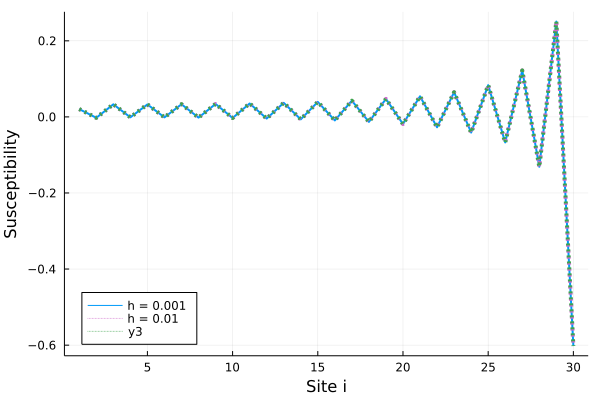

In [49]:
plot(collect(1:30), (nup1 - n0)./0.001, linewidth = 2, label = "h = 0.001", legend=:bottomleft)
plot!(collect(1:30), (nup2- n0)./0.01,   linestyle = :dot, linewidth = 4,
    linecolor = :orchid3, label = "h = 0.01", legend=:bottomleft)
plot!(collect(1:30), chi/0.001, linewidth = 4,  linestyle = :dot)

xlabel!("Site i")
ylabel!("Susceptibility")